<a href="https://colab.research.google.com/github/manigopinalajala/Final_Project/blob/master/Copy_of_Ask_of_ORIGA_DISC_AND_CUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, UpSampling2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, MaxPooling2D)
import os
import cv2
import shutil
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import glob
from scipy.io import loadmat
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
shutil.copytree('/content/drive/MyDrive/Refugeee/ORIGA','/content/Origa')

FileNotFoundError: ignored

In [5]:

SIZE= 512 #Resize images (height  = X, width = Y)
SIZE1= 512
#count = 0
#Capture training image info as a list
train_images = []
path = "/content/drive/MyDrive/glucomadata/train/tr_images/*.*"
for file in sorted(glob.glob(path)):
        #img = cv2.imread(file, 0)
        img = cv2.imread(file, cv2.IMREAD_COLOR) 
        img = cv2.resize(img, (SIZE1, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img = img/255.
        #img= img.astype(np.float32)
        train_images.append(img)     

In [6]:
train_images=train_images[:300]

In [7]:
#len(train_images)

In [8]:
train_images1= np.array(train_images)
print(train_images1.shape)

(300, 512, 512, 3)


In [24]:
#Capture training image info as a list
import numpy as np
from PIL import Image as im
train_masks = []
path = "/content/drive/MyDrive/glucomadata/train/tr_masks/*.png*"
SIZE= 512 #Resize images (height  = X, width = Y)
SIZE1= 512

for file in sorted(glob.glob(path)):
        #img = cv2.imread(file, 0)
        img = cv2.imread(file, cv2.IMREAD_COLOR) 
        img = cv2.resize(img, (SIZE1, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img = img/255.
        #img= img.astype(np.float32)
        train_masks.append(img)

In [10]:
#Capture training image info as a list
import numpy as np
from PIL import Image as im
train_masks = []
path = "/content/drive/MyDrive/glucomadata/train/tr_masks/*.png*"

for file in sorted(glob.glob(path)):
        c = loadmat(file)
        x = c.get("mask")
        y= cv2.resize(x,(512,512))
       # img = cv2.cvtColor(y, cv2.COLOR_BGR2)
        train_masks.append(y)

ValueError: ignored

In [25]:
train_masks=train_masks[:300]

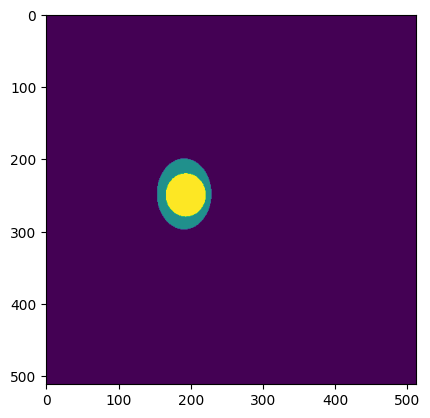

In [26]:
plt.imshow(train_masks[4])

In [28]:
#print("Total images in the original dataset are: ", len(image_names))

#print("Max pixel value in image is: ", train_masks.max())
print("Labels in the mask are : ", np.unique(train_masks))

Labels in the mask are :  [0 1 2]


In [29]:
'''train_masks1= np.array(train_masks)
print(train_masks1.shape)'''

'train_masks1= np.array(train_masks)\nprint(train_masks1.shape)'

In [30]:
len(train_masks)

300

In [31]:
#train_masks = np.expand_dims(train_masks,axis =-1)
#train_masks.shape

In [32]:
n_classes=3

In [33]:
from tensorflow.keras.utils import to_categorical
y_train_final=[]
for y_train1 in train_masks:
  y_train_final.append(to_categorical(y_train1, num_classes=n_classes)[:,:,0:])
# print(train_masks_cat.shape)
# y_train_cat = train_masks_cat.reshape((y_train.shape[0],y_train.shape[2], n_classes))
y_train_1= np.array(y_train_final)

In [34]:
IMG_HEIGHT = 512
IMG_WIDTH = 512
IMG_CHANNELS=3

In [35]:
%%time
from keras.models import Model
from keras.layers import Input, Conv2D, UpSampling2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
s = inputs

    #Contraction path
#c1 = Conv2D(8, (1, 1), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(s)
c1 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(s)
#C1 = Dropout(0.2)(c1)
k1 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(s)
p1 = MaxPooling2D((1, 1))(c1)
#print(p1)
U1 = UpSampling2D((1, 1))(k1)
#print(U1)
R1 = concatenate([p1,U1])
R1 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(R1)
    
c2 = Conv2D(16, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(R1)
#C2 = Dropout(0.2)(c2)
k2 = Conv2D(16, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(R1)
p2 = MaxPooling2D((1, 1))(c2)
U2 = UpSampling2D((1, 1))(k2)
R2 = concatenate([p2,U2])
R2 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(R2)

     
c3 = Conv2D(32, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(R2)
#C3 = Dropout(0.2)(c3)
k3 = Conv2D(32, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(R2)
p3 = MaxPooling2D((1, 1))(c3)
U3 = UpSampling2D((1, 1))(k3)
R3 = concatenate([p3,U3])
R3 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(R3)

#Expansive path 

u7 = Conv2D(32, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(p3)
#print(u7)
#u7 = Dropout(0.2)(u7)
U7 = UpSampling2D((1,1))(u7)
k7 = Conv2D(32, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(U3)
p7 = MaxPooling2D((1,1))(k7)
R4 = concatenate([p7,U7])
B1 = concatenate([p2, R4])
B2 = concatenate([U2, R4])
B1 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(B1)
B2 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(B2)
#c7 = Conv2D(64, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2D(16, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(B1)
#print(u8)
#u8 = Dropout(0.2)(u8)
U8 = UpSampling2D((1,1))(u8)
k8 = Conv2D(16, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(B2)
p8 = MaxPooling2D((1,1))(k8)
R5 = concatenate([p8,U8])
B3 = concatenate([p1, R5])
B4 = concatenate([U1, R5])
B3 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(B3)
B4 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(B4)
#c7 = Conv2D(64, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(c7)

u9 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(B3)
#print(u9)
#u9 = Dropout(0.2)(u9)
U9 = UpSampling2D((1,1))(u9)
k9 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(B4)
p9 = MaxPooling2D((1,1))(k9)
B5 = concatenate([p9, U9])
B5 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(B5)

#c7 = Conv2D(64, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(c7)

outputs = Conv2D(3, (1, 1), activation='sigmoid')(B5)
     
model = Model(inputs=[inputs], outputs=[outputs])

#model.summary()

CPU times: user 460 ms, sys: 781 µs, total: 461 ms
Wall time: 472 ms


In [36]:
#%%time
from keras.models import Model
import numpy as np
from keras.layers import Input, Conv2D, UpSampling2D, MaxPooling2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
s = inputs

    #Contraction path
#c1 = Conv2D(8, (1, 1), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(s)
c1 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(s)
#C1 = Dropout(0.2)(c1)
k1 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(s)
p1 = MaxPooling2D((1, 1))(c1)
#print(p1)
U1 = UpSampling2D((1, 1))(k1)
#print(U1)
T1 = concatenate([p1,U1])
   
   #spatial attention module

S1 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(T1)
S1 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(S1)
S1 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(S1)
c11 = Conv2D(8, (1, 1), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(T1)
#print(p1)
P1 = MaxPooling2D((2, 2))(c11)
p11 = MaxPooling2D((4, 4))(c11)
#print(U1)
u1 = UpSampling2D((2, 2))(P1)
U11 = UpSampling2D((4, 4))(p11)
R1 = Conv2D(8, (3, 3), activation='sigmoid', kernel_initializer='he_normal', padding = 'same')(u1)
R11 = Conv2D(8, (3, 3), activation='sigmoid', kernel_initializer='he_normal', padding = 'same')(U11)
#R1 = concatenate([p1,U1]
E1 = R1 + R11
#d1 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(E1)
M1 = E1 * S1
E2 = M1 + c11
    
c2 = Conv2D(16, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(E1)
#C2 = Dropout(0.2)(c2)
k2 = Conv2D(16, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(E2)
p2 = MaxPooling2D((1, 1))(c2)
U2 = UpSampling2D((1, 1))(k2)
T2 = concatenate([p2,U2])
  
  #spatial attention module

S2 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(T2)
S2 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(S2)
S2 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(S2)
c12 = Conv2D(8, (1, 1), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(T2)
#print(p1)
P2 = MaxPooling2D((2, 2))(c12)
p12 = MaxPooling2D((4, 4))(c12)
#print(U1)
u2 = UpSampling2D((2, 2) )(P2)
U12 = UpSampling2D((4, 4))(p12)
R2 = Conv2D(8, (3, 3), activation='sigmoid', kernel_initializer='he_normal', padding = 'same')(u2)
R12 = Conv2D(8, (3, 3), activation='sigmoid', kernel_initializer='he_normal', padding = 'same')(U12)
#R1 = concatenate([p1,U1]
E3 = R2 + R12
#d2 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(E3)
M2 = E3 * S2
E4 = M2 + c12
     
c3 = Conv2D(32, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(E3)
#C3 = Dropout(0.2)(c3)
k3 = Conv2D(32, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(E4)
p3 = MaxPooling2D((1, 1))(c3)
U3 = UpSampling2D((1, 1))(k3)
T3 = concatenate([p3,U3])
 
  #spatial attention module

S3 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(T3)
S3 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(S3)
S3 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(S3)
c13 = Conv2D(8, (1, 1), activation='LeakyReLU', kernel_initializer='he_normal', padding = 'same')(T3)
P3 = MaxPooling2D((2, 2))(c13)
p13 = MaxPooling2D((4, 4))(c13)
u3 = UpSampling2D((2, 2))(P3)
U13 = UpSampling2D((4, 4))(p13)
#print(p1)

#print(U1)
R3 = Conv2D(8, (3, 3), activation='sigmoid', kernel_initializer='he_normal', padding = 'same')(u3)
R13 = Conv2D(8, (3, 3), activation='sigmoid', kernel_initializer='he_normal', padding = 'same')(U13)
#R1 = concatenate([p1,U1]
E5 = R3 + R13
#d3 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(E5)
M3 = E5 * S3
E6 = M3 + c13

#Expansive path 

u7 = Conv2D(32, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(p3)
#print(u7)
#u7 = Dropout(0.2)(u7)
U7 = UpSampling2D((1,1))(u7)
k7 = Conv2D(32, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(U3)
p7 = MaxPooling2D((1,1))(k7)
T4 = concatenate([p7,U7])
   
   #channel attention module

A1 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(T4)
A1 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(A1)
A1 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(A1)
A11 = Conv2D(8, (1, 1), kernel_initializer='he_normal', padding = 'same')(T4)
G1 = MaxPooling2D((1,1))(A1)
D1 = Dense(8, activation='LeakyReLU')(G1)
D1 = Dense(8, activation='sigmoid')(D1)
#R1 = concatenate([p1,U1]
#E1 = np.add(R1,R11)
#d4 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(D1)
M4 = D1 * A1
E7 = M4 + A11

B1 = concatenate([E7, p2])
B2 = concatenate([E7, U2])
#B1 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(B1)

#c7 = Conv2D(64, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2D(16, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(B1)
#print(u8)
#u8 = Dropout(0.2)(u8)
U8 = UpSampling2D((1,1))(u8)
k8 = Conv2D(16, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(B2)
p8 = MaxPooling2D((1,1))(k8)
T5 = concatenate([p8,U8])

   #channel attention module

A2 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(T5)
A2 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(A2)
A2 = Conv2D(8, (3, 3), kernel_initializer='he_normal', padding = 'same')(A2)
A12 = Conv2D(8, (1, 1), kernel_initializer='he_normal', padding = 'same')(T5)
G2 = MaxPooling2D((1,1))(A2)
D2 = Dense(8, activation='LeakyReLU')(G2)
D2 = Dense(8, activation='sigmoid')(D2)
#R1 = concatenate([p1,U1]
#E1 = np.add(R1,R11)
#d5 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(D2)
M5 = D2 * A2
E8 = M4 + A12

B3 = concatenate([p1, E8])
B4 = concatenate([U1, E8])

#B4 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(B4)
#c7 = Conv2D(64, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(c7)

u9 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(B3)
#print(u9)
#u9 = Dropout(0.2)(u9)
U9 = UpSampling2D((1,1))(u9)
k9 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(B4)
p9 = MaxPooling2D((1,1))(k9)
B5 = concatenate([p9, U9])
#B5 = Conv2D(8, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', dilation_rate = 2, padding = 'same')(B5)

#c7 = Conv2D(64, (3, 3), activation='LeakyReLU', kernel_initializer='he_normal', padding='same')(c7)

outputs = Conv2D(3, (1, 1), activation='sigmoid')(B5)
     
model = Model(inputs=[inputs], outputs=[outputs])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_82 (Conv2D)             (None, 512, 512, 8)  224         ['input_4[0][0]']                
                                                                                                  
 conv2d_81 (Conv2D)             (None, 512, 512, 8)  224         ['input_4[0][0]']                
                                                                                                  
 up_sampling2d_24 (UpSampling2D  (None, 512, 512, 8)  0          ['conv2d_82[0][0]']        

In [37]:
import tensorflow as tf
'''tf.keras.optimizers.Adam(
    learning_rate=0.0001
)'''
tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.9,
    epsilon=1e-07,
    #decay=0.0001,
    centered=False,
    name="rmsprop"
)

In [38]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

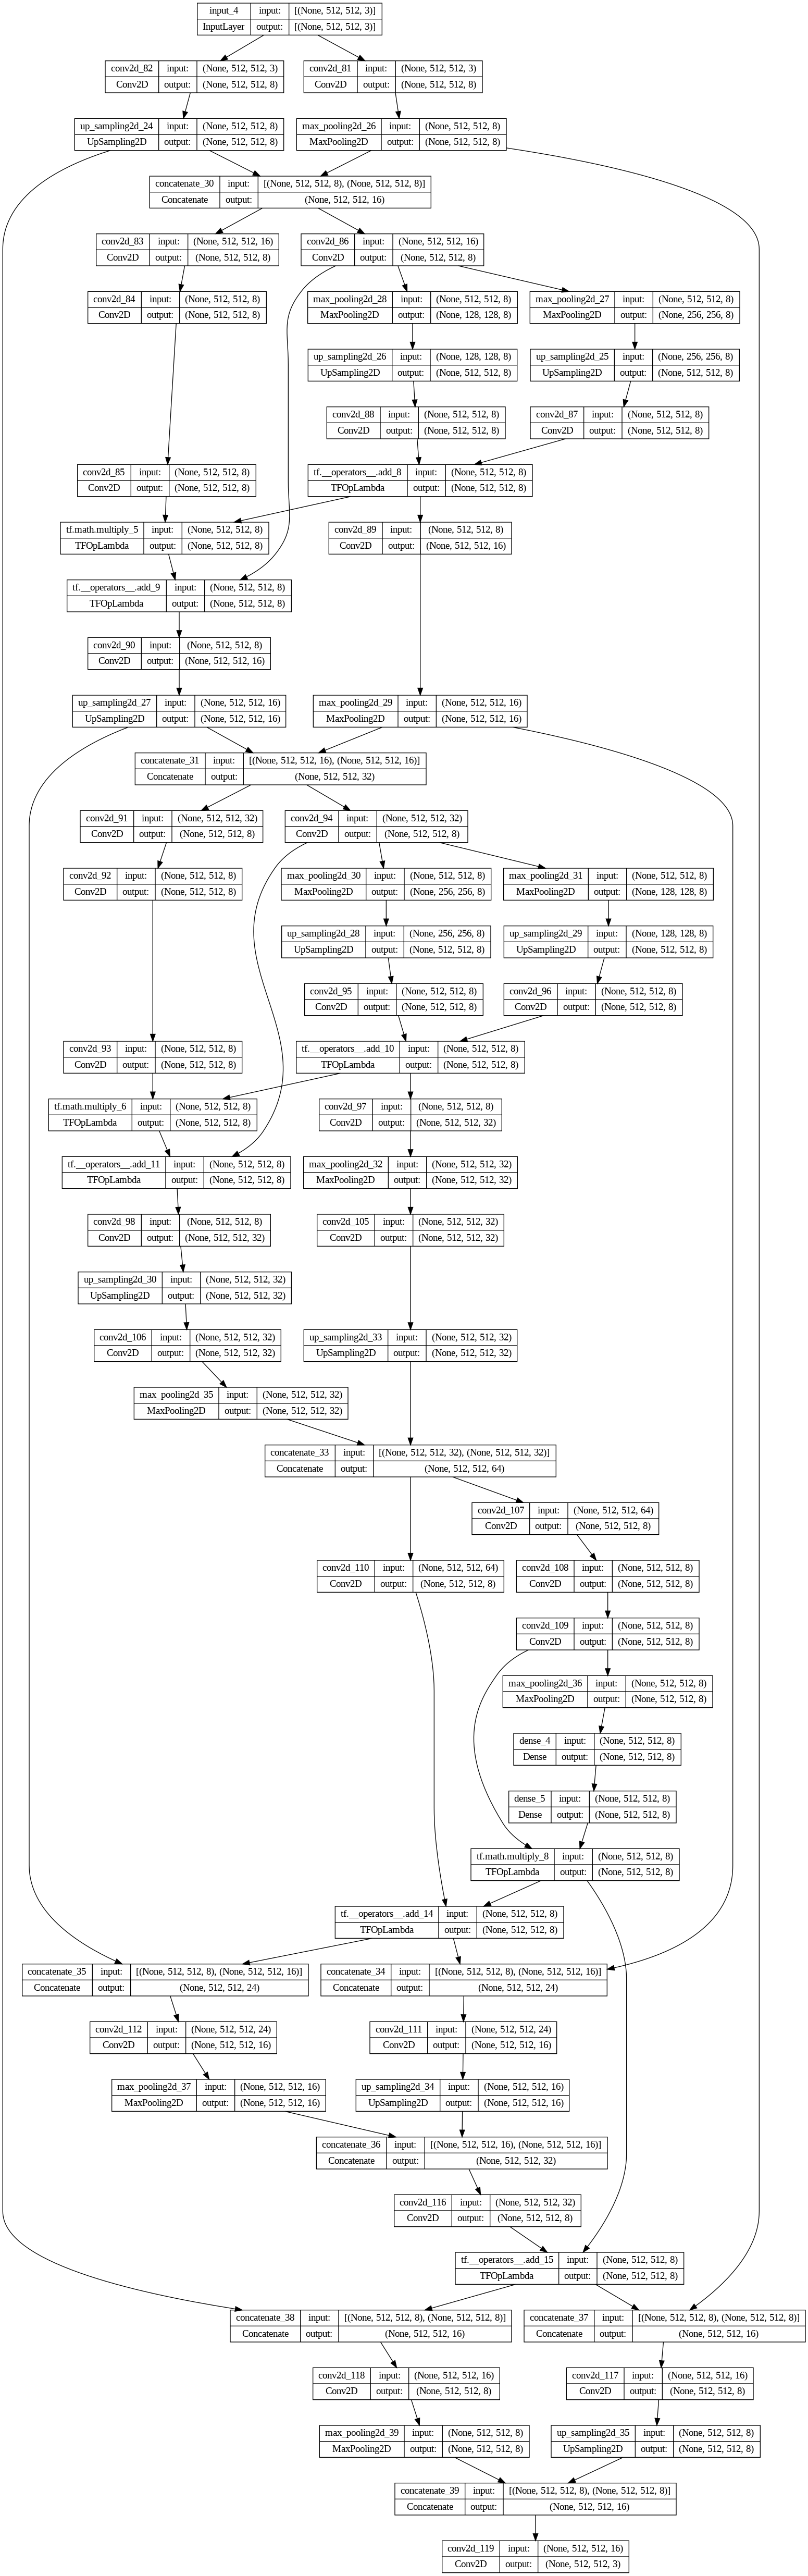

In [39]:
tf.keras.utils.plot_model(model, to_file="ASKIte_model_16-7-22.png", show_shapes=True)

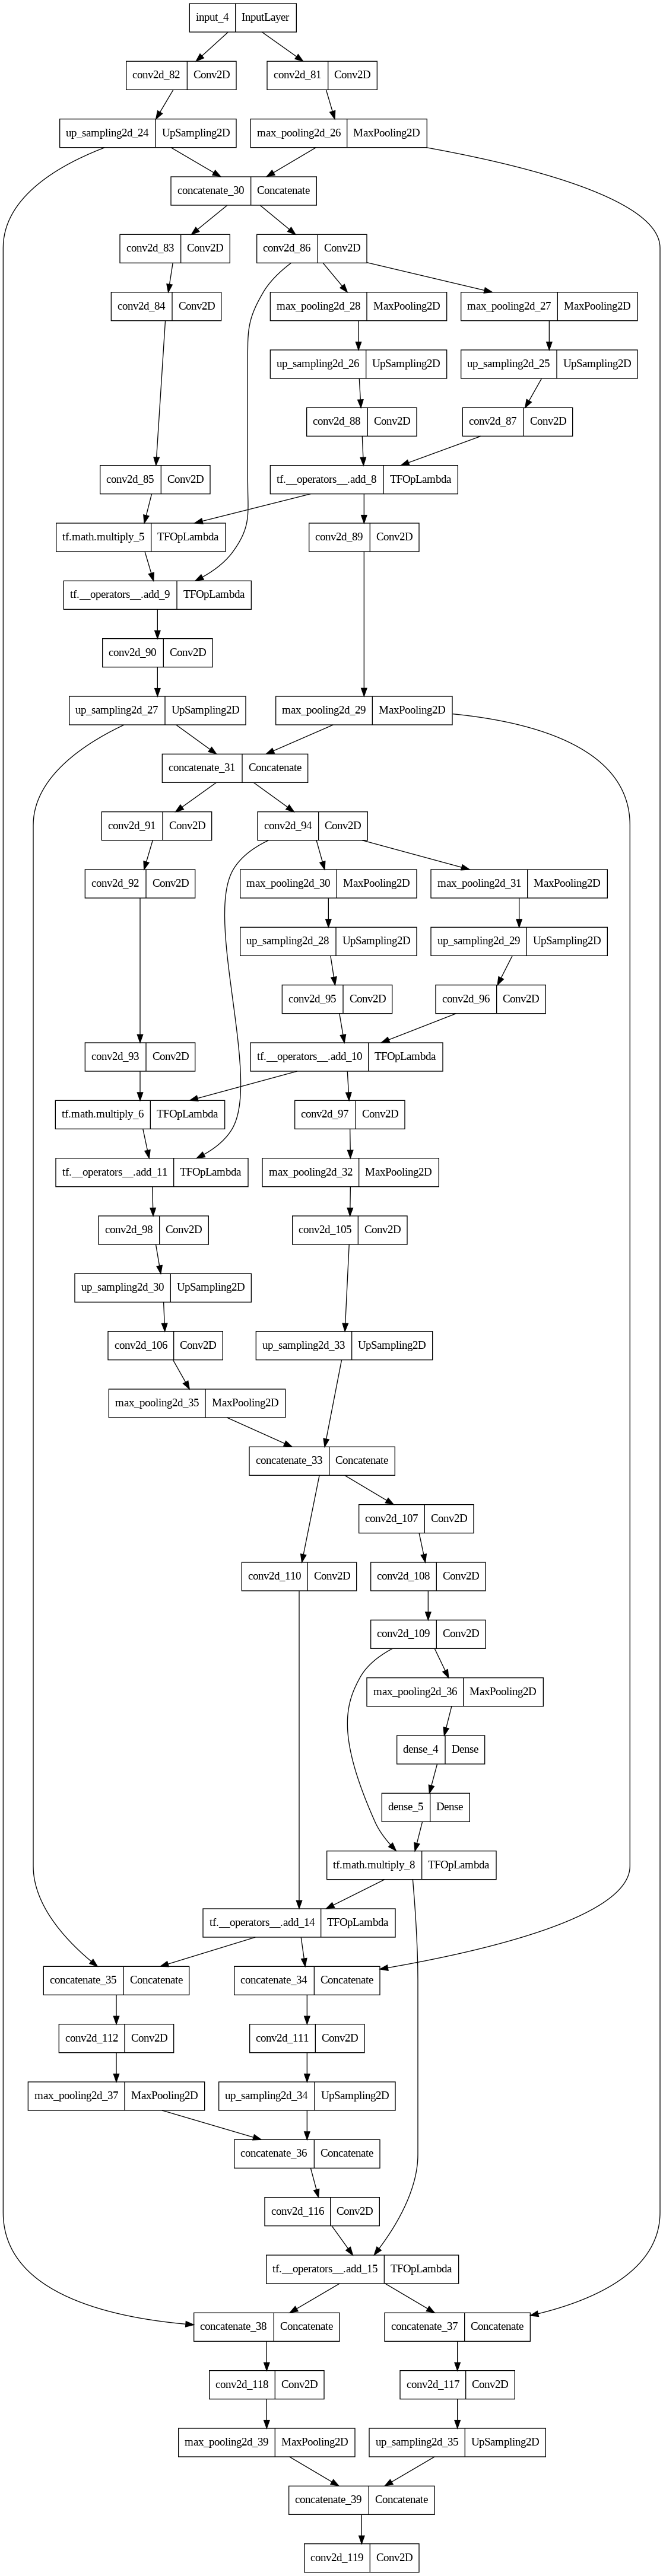

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='ask_unetmodel_16-7-22.png')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_images1,y_train_1,test_size =0.1)

In [43]:
print(np.asarray(X_train.shape))
print(np.asarray(X_test.shape))
print(np.asarray(y_train.shape))
print(np.asarray(y_test.shape))

[270 512 512   3]
[ 30 512 512   3]
[270 512 512   3]
[ 30 512 512   3]


In [44]:
'''callbacks = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/loss_weights_13-06-2022',
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
    initial_value_threshold=None, 
)'''

'callbacks = tf.keras.callbacks.ModelCheckpoint(\n    \'/content/drive/MyDrive/loss_weights_13-06-2022\',\n    monitor="val_loss",\n    verbose=0,\n    save_best_only=False,\n    save_weights_only=False,\n    mode="auto",\n    save_freq="epoch",\n    options=None,\n    initial_value_threshold=None, \n)'

In [45]:
'''%%time
checkpoint = ModelCheckpoint("best_model_asknet_15-07-22.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

model.fit(X_train, y_train,
          batch_size=3,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])'''

'%%time\ncheckpoint = ModelCheckpoint("best_model_asknet_15-07-22.hdf5", monitor=\'loss\', verbose=1,\n    save_best_only=True, mode=\'auto\', period=1)\n\nmodel.fit(X_train, y_train,\n          batch_size=3,\n          epochs=100,\n          verbose=1,\n          validation_data=(X_test, y_test),\n          callbacks=[checkpoint])'

In [46]:
%%time
history = model.fit(X_train, y_train, 
                    batch_size = 3, 
                    verbose=1, 
                    epochs=150, 
                    validation_data=(X_test, y_test), 
                    #class_weight=class_weights,
                    #callbacks= callbacks,
                    shuffle=False) 

Epoch 1/150
90/90 [==============================] - 51s 333ms/step - loss: 10.6189 - accuracy: 0.9570 - val_loss: 92.0039 - val_accuracy: 0.2348
Epoch 2/150
90/90 [==============================] - 31s 341ms/step - loss: 2.1070 - accuracy: 0.9645 - val_loss: 0.3648 - val_accuracy: 0.9752
Epoch 3/150
90/90 [==============================] - 31s 349ms/step - loss: 0.5232 - accuracy: 0.9705 - val_loss: 0.2693 - val_accuracy: 0.9253
Epoch 4/150
90/90 [==============================] - 31s 345ms/step - loss: 0.3673 - accuracy: 0.9750 - val_loss: 0.1795 - val_accuracy: 0.9471
Epoch 5/150
90/90 [==============================] - 31s 345ms/step - loss: 0.2568 - accuracy: 0.9734 - val_loss: 0.1478 - val_accuracy: 0.9811
Epoch 6/150
90/90 [==============================] - 31s 348ms/step - loss: 0.2241 - accuracy: 0.9710 - val_loss: 0.1342 - val_accuracy: 0.9531
Epoch 7/150
90/90 [==============================] - 31s 347ms/step - loss: 0.1851 - accuracy: 0.9736 - val_loss: 0.4569 - val_accurac

In [47]:
#model.save_weights('origaweights_asknet_LeakyReLU_512_300img_150eps_bs-3_16-07-2022.h5')

In [48]:
#model.save('ASKI_UnetLeakyReLU_maxactfunv;2;3,3_16-07-22.hdf5')

1/1 [==============================] - 1s 1s/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


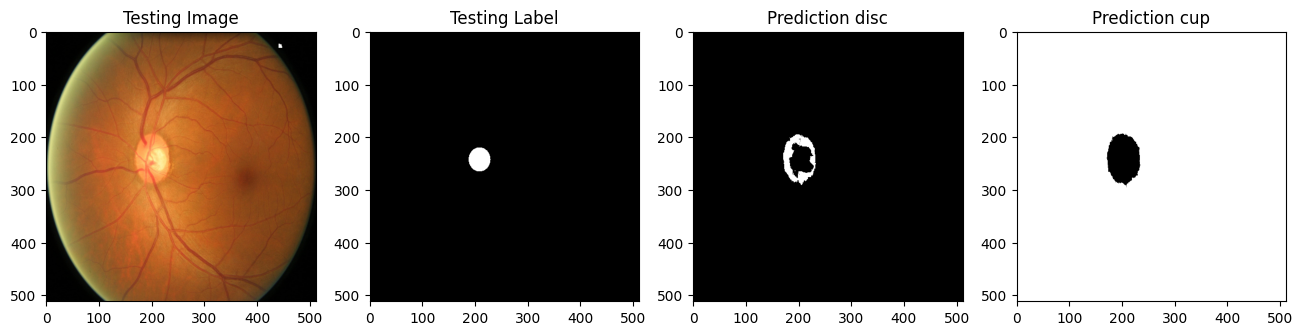

0
1/1 [==============================] - 0s 43ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


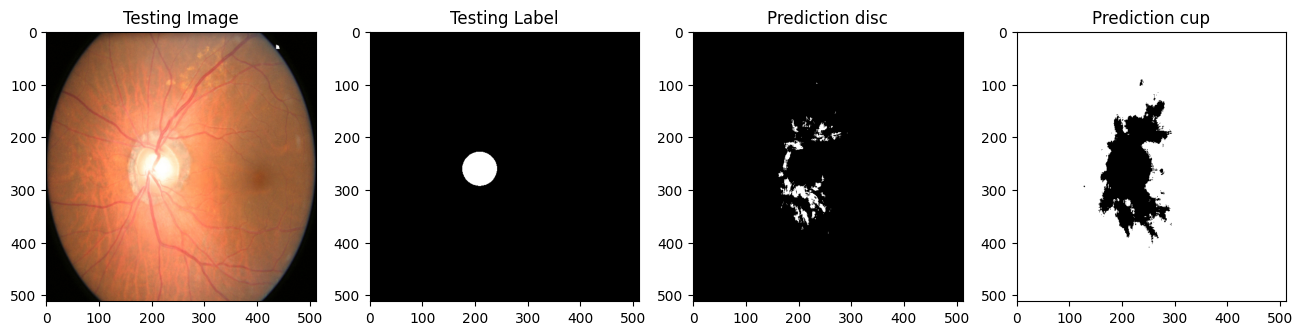

1
1/1 [==============================] - 0s 54ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


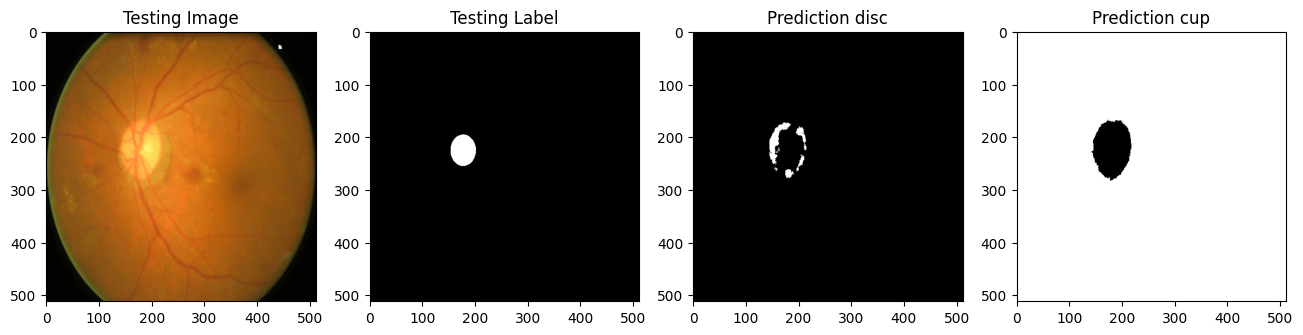

2
1/1 [==============================] - 0s 53ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


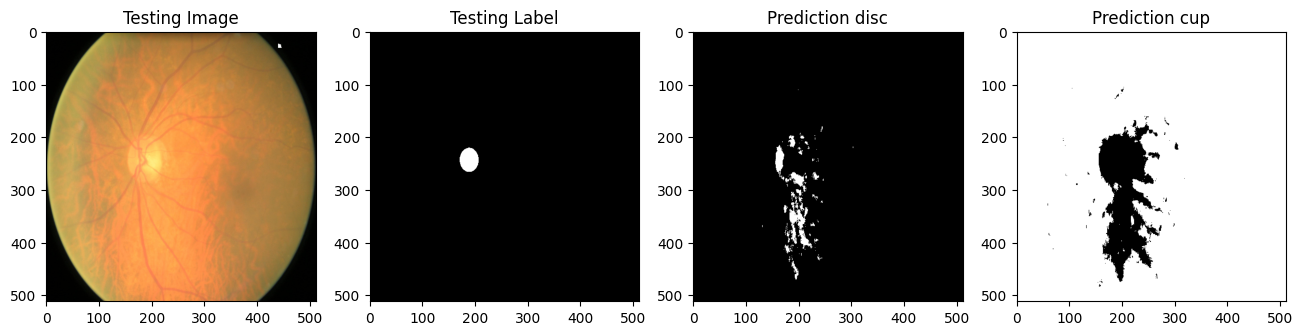

3
1/1 [==============================] - 0s 54ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


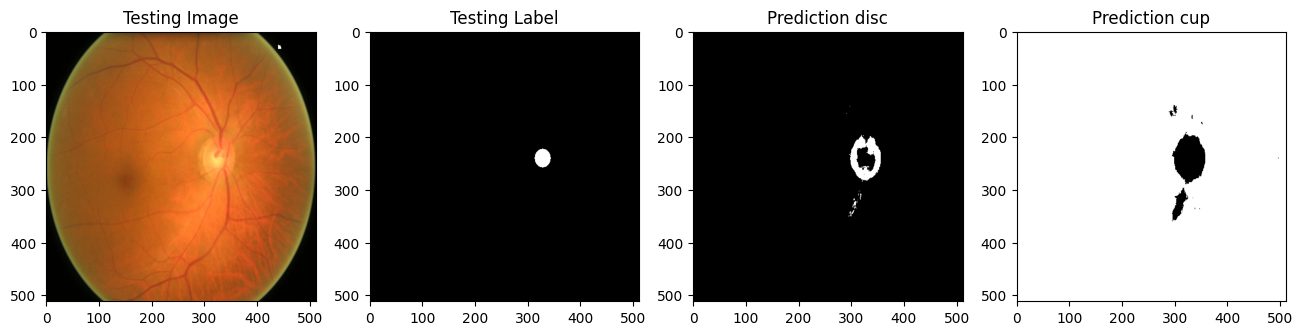

4
1/1 [==============================] - 0s 53ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


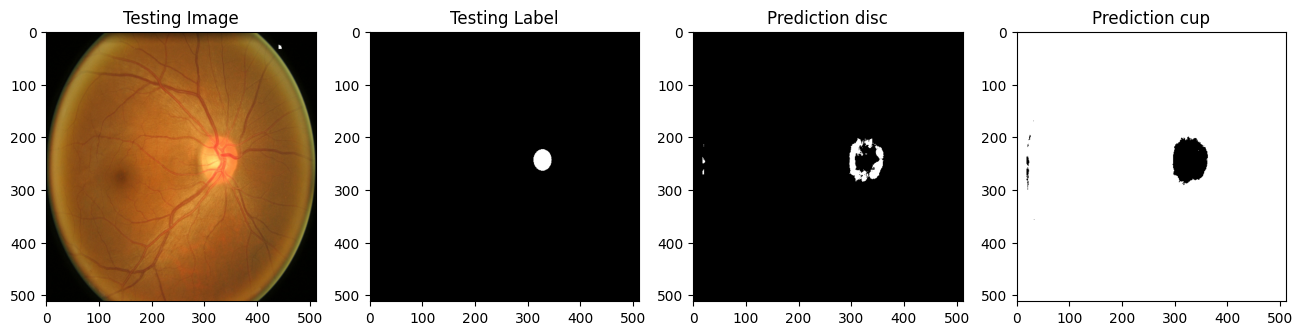

5
1/1 [==============================] - 0s 69ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


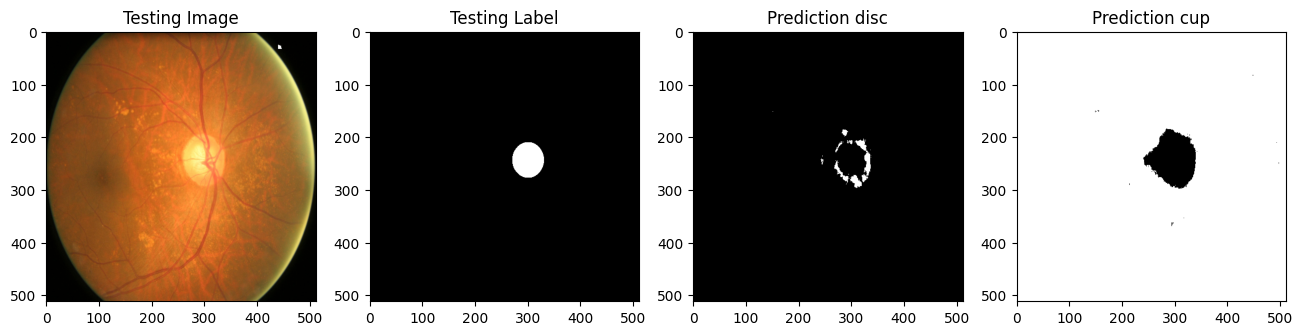

6
1/1 [==============================] - 0s 60ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


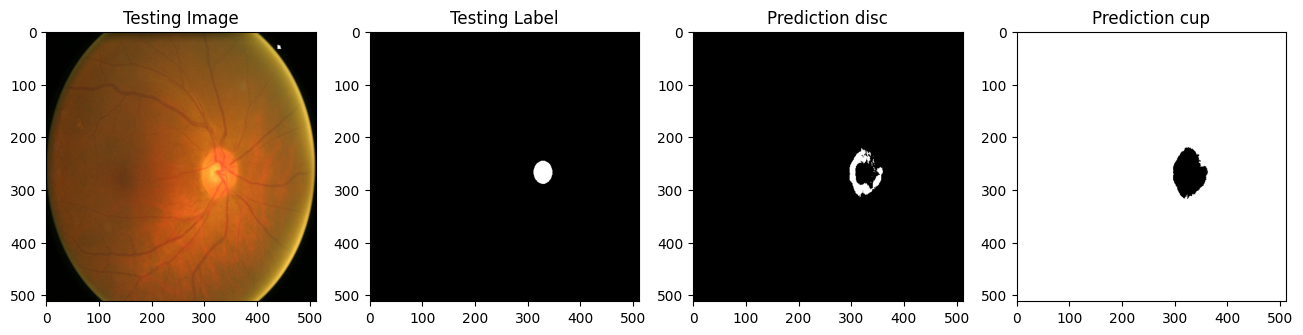

7
1/1 [==============================] - 0s 75ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


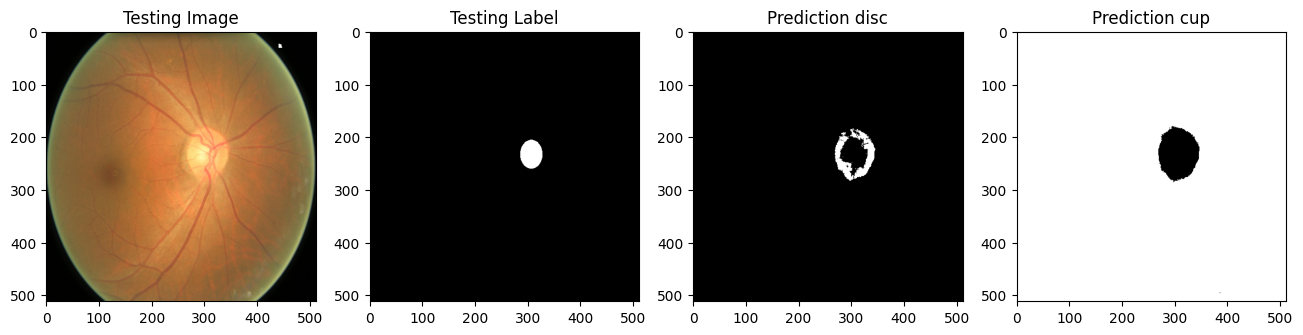

8
1/1 [==============================] - 0s 60ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


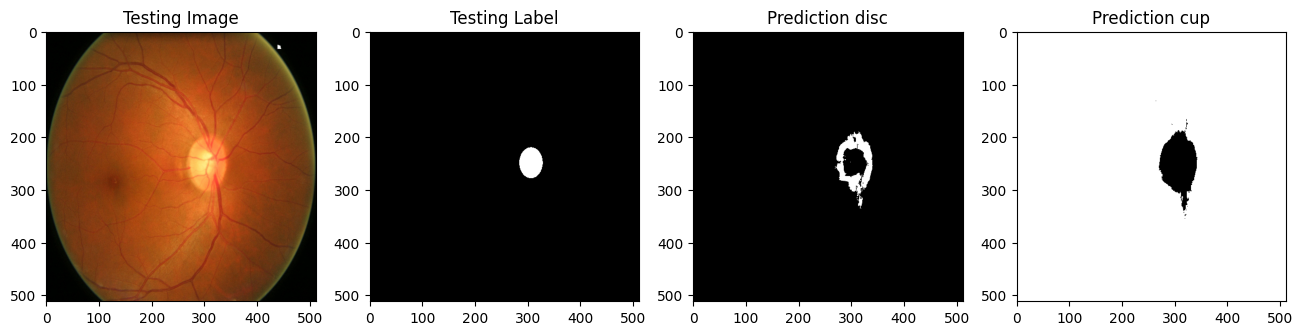

9
1/1 [==============================] - 0s 57ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


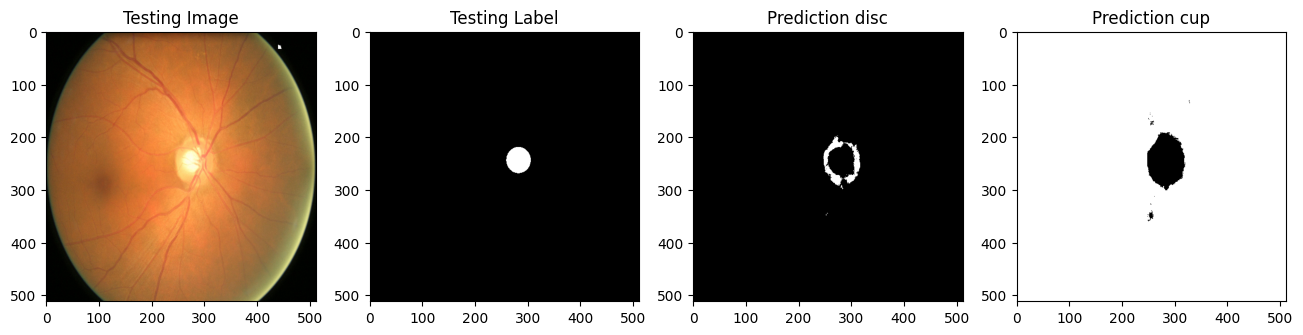

10
1/1 [==============================] - 0s 54ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


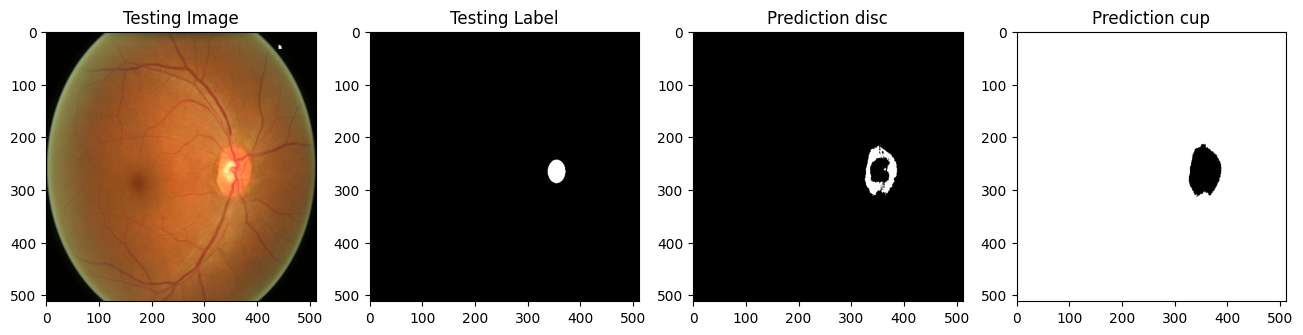

11
1/1 [==============================] - 0s 61ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


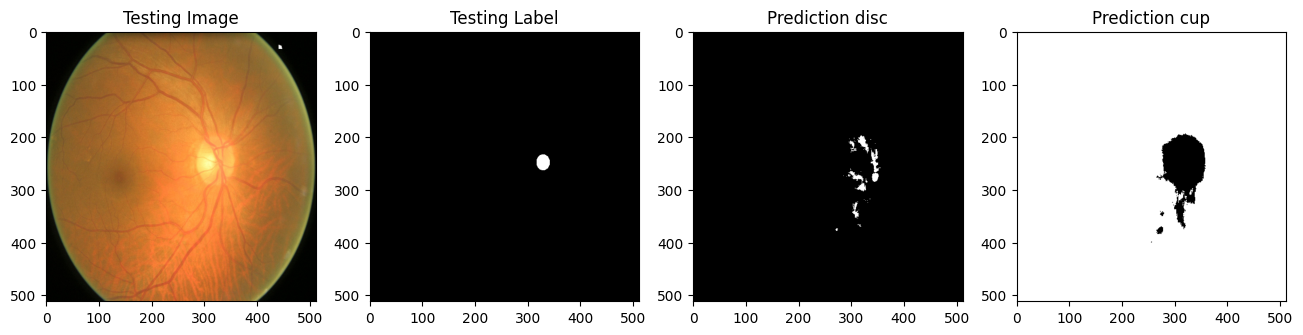

12
1/1 [==============================] - 0s 59ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


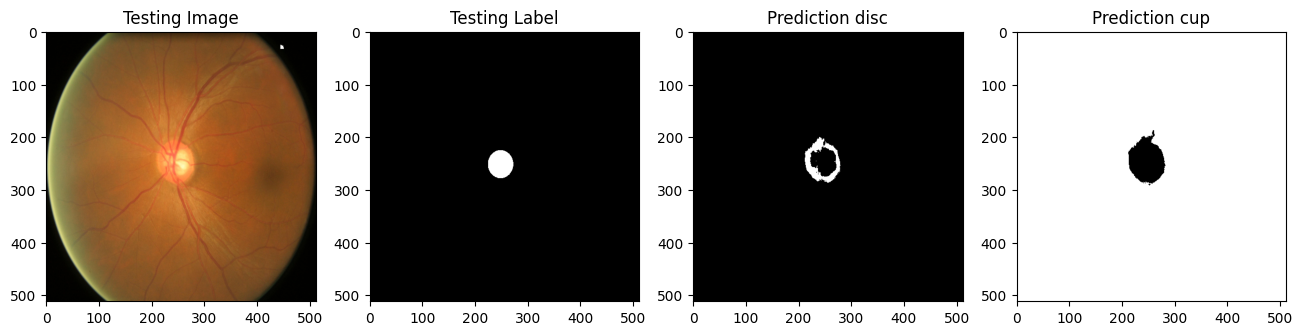

13
1/1 [==============================] - 0s 58ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


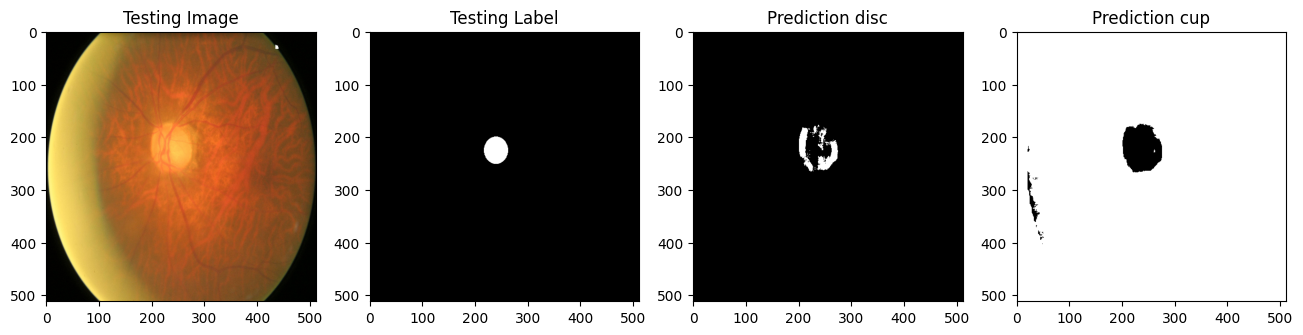

14
1/1 [==============================] - 0s 61ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


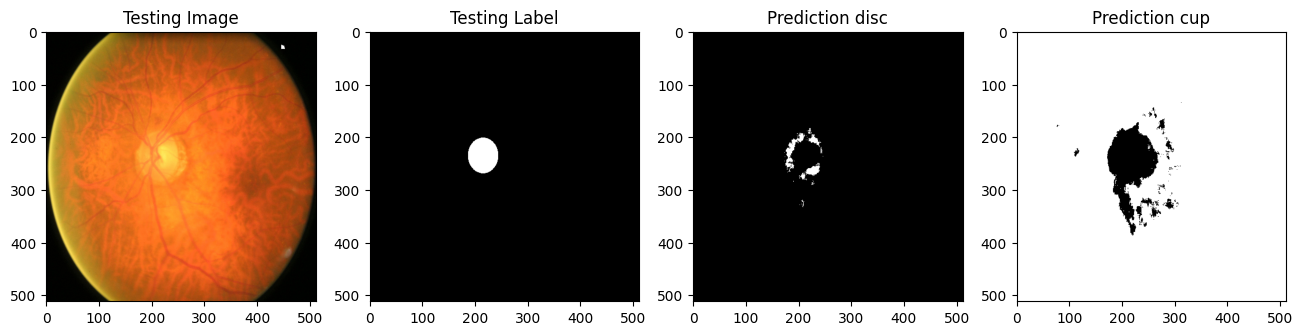

15
1/1 [==============================] - 0s 64ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


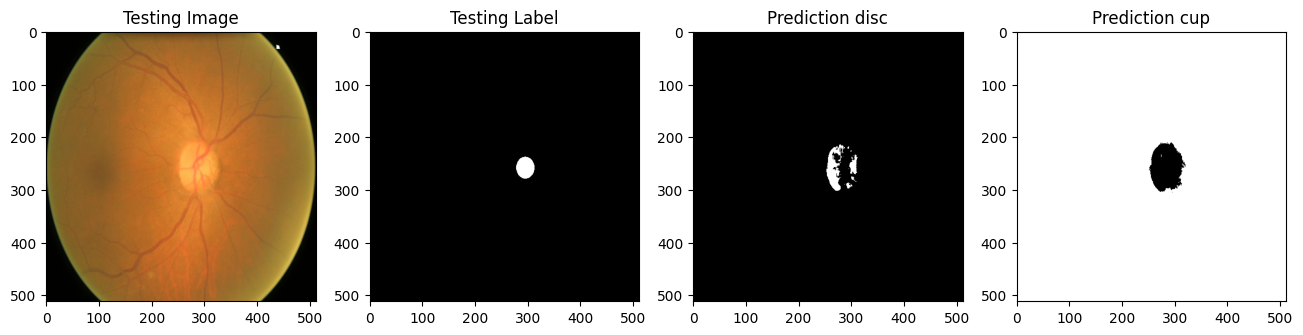

16
1/1 [==============================] - 0s 61ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


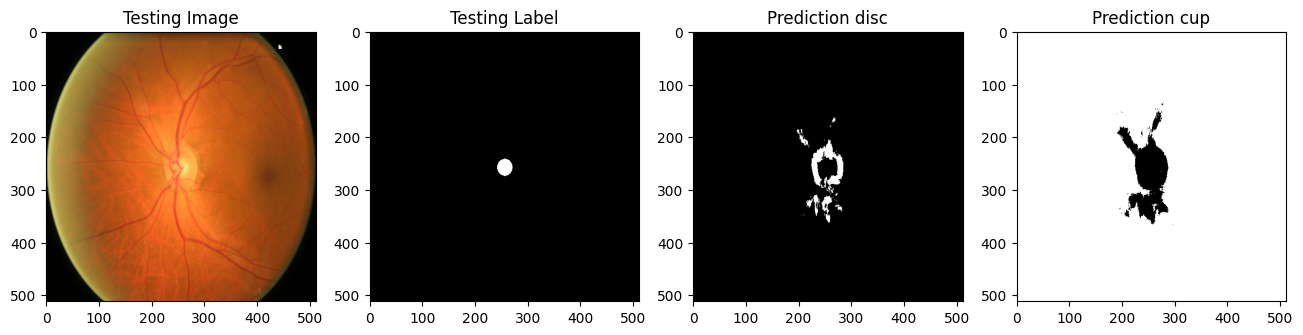

17
1/1 [==============================] - 0s 67ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


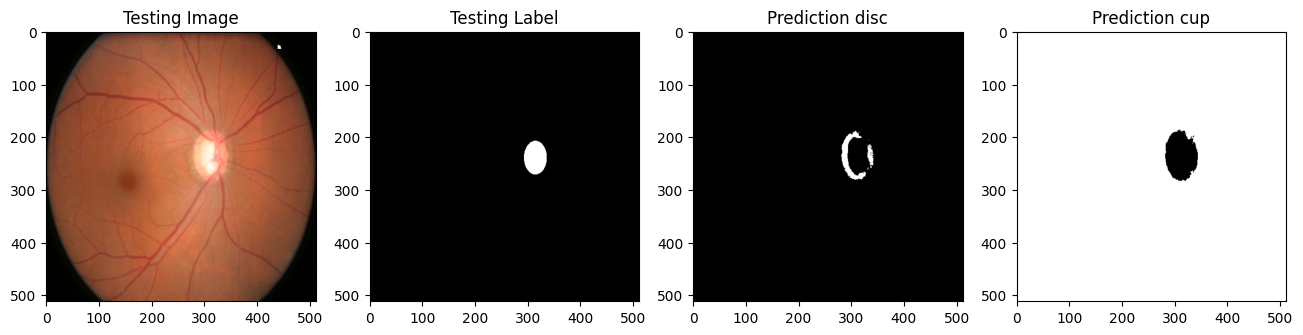

18
1/1 [==============================] - 0s 62ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


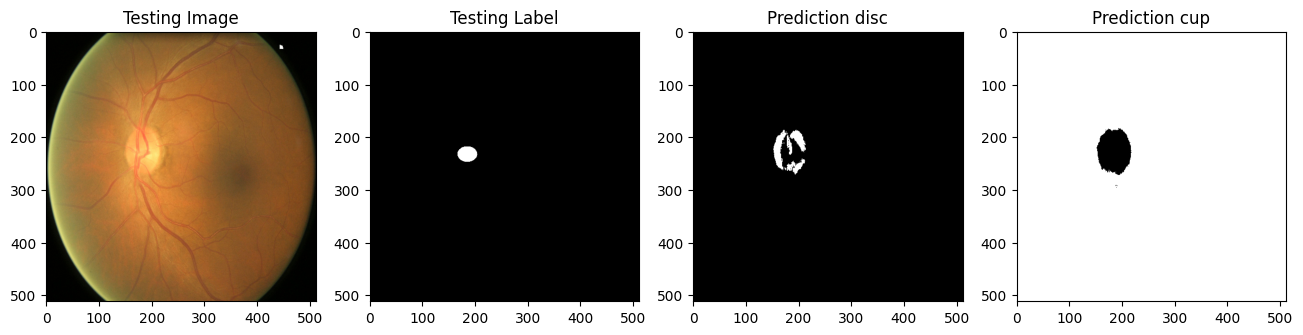

19
1/1 [==============================] - 0s 60ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


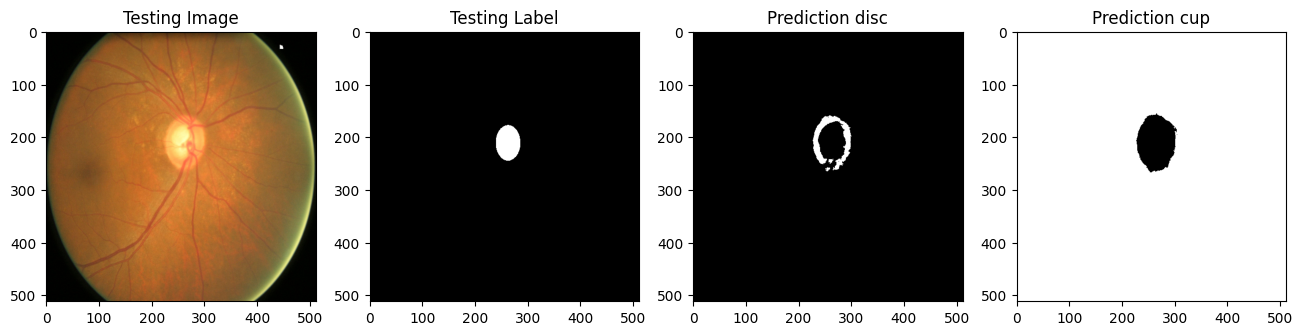

20
1/1 [==============================] - 0s 77ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


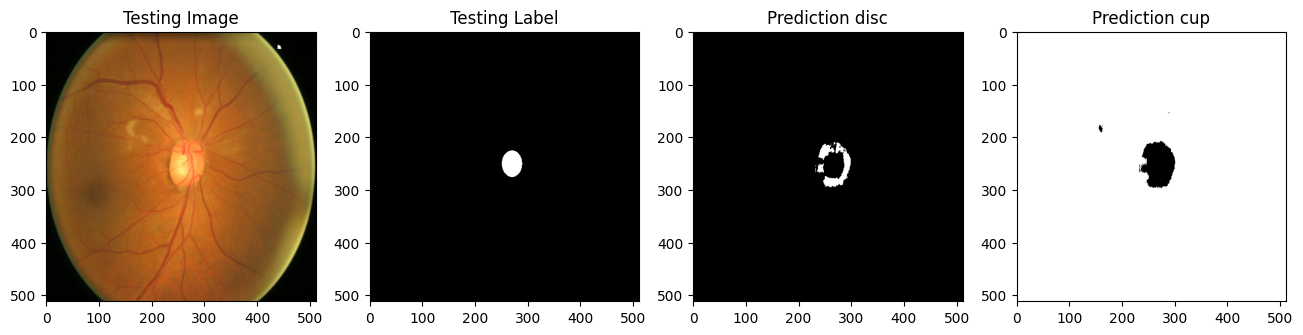

21
1/1 [==============================] - 0s 79ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


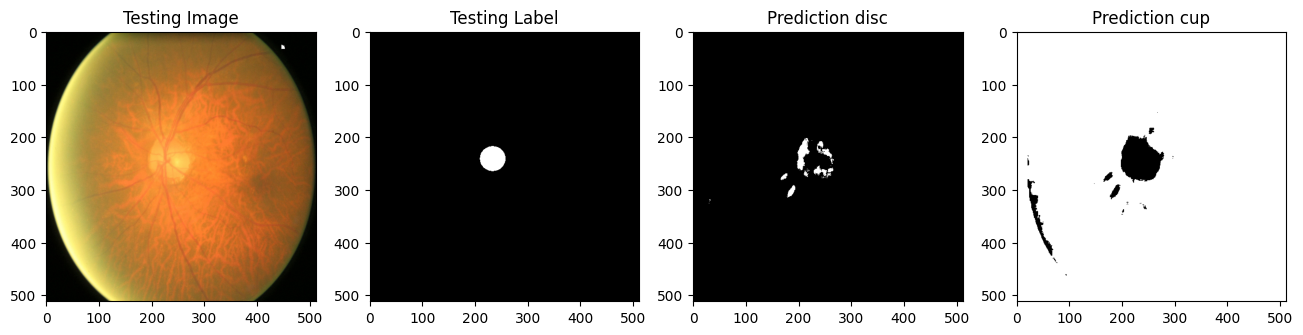

22
1/1 [==============================] - 0s 91ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


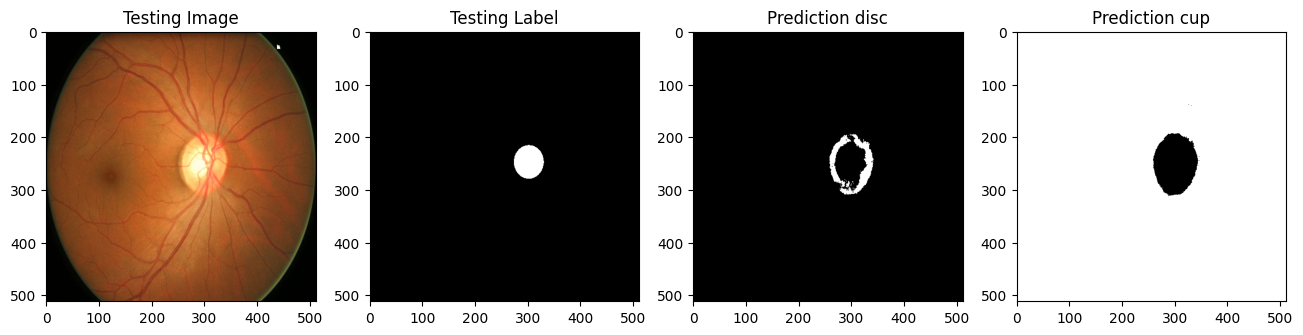

23
1/1 [==============================] - 0s 59ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


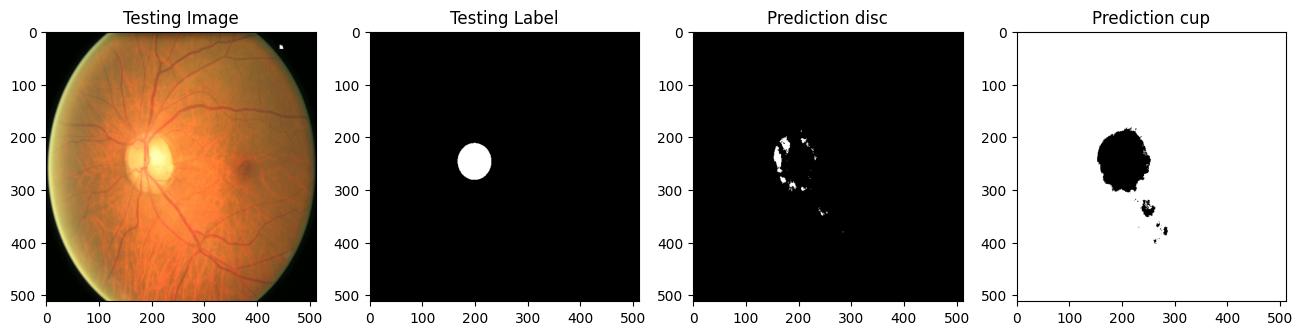

24
1/1 [==============================] - 0s 61ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


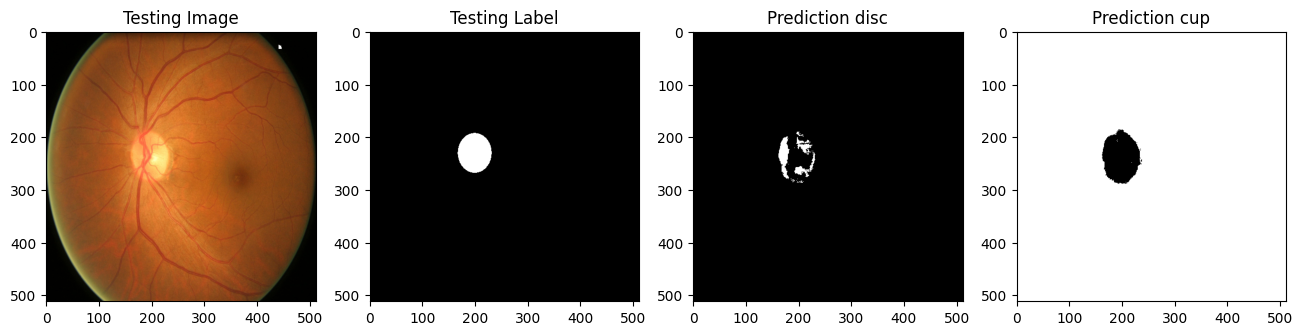

25
1/1 [==============================] - 0s 59ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


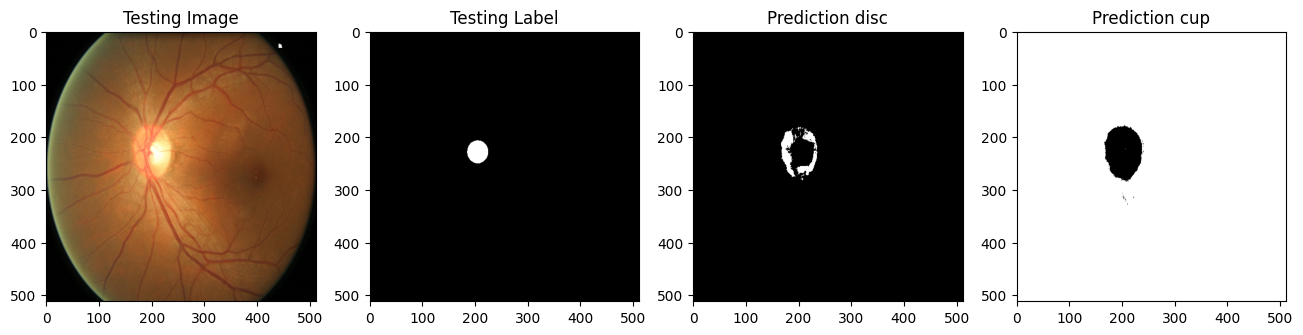

26
1/1 [==============================] - 0s 66ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


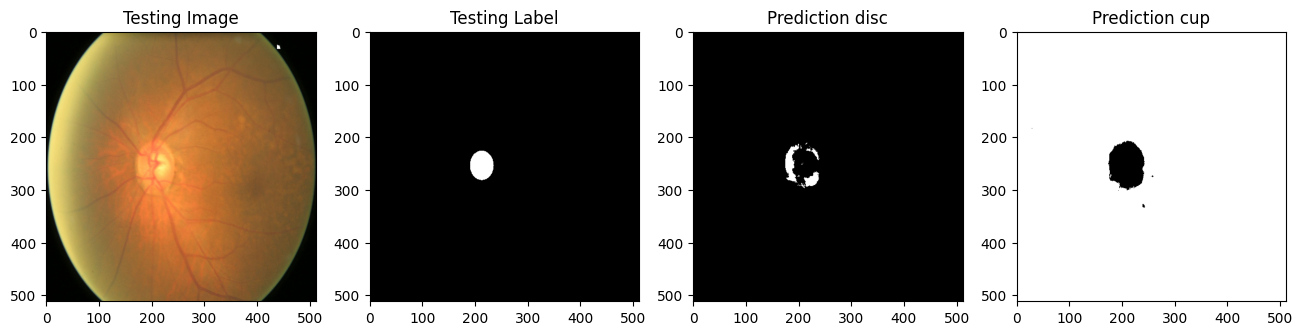

27
1/1 [==============================] - 0s 60ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


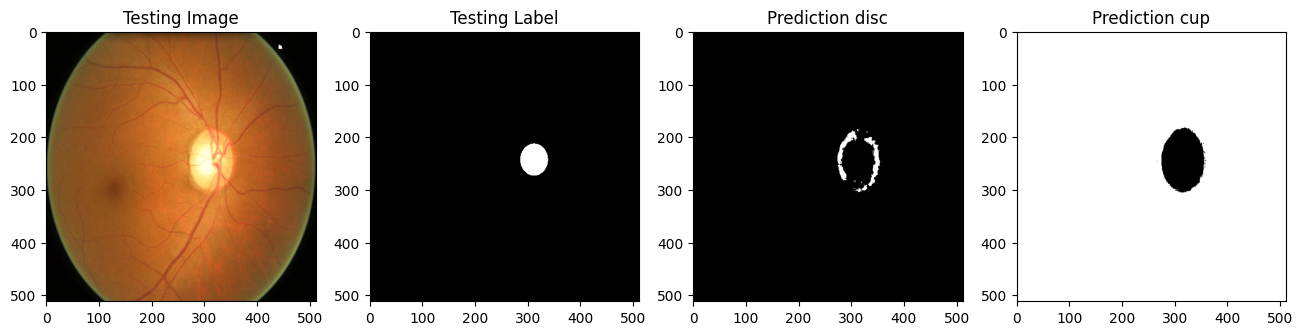

28
1/1 [==============================] - 0s 61ms/step
(512, 512)
(1, 512, 3)
(1, 512, 3)


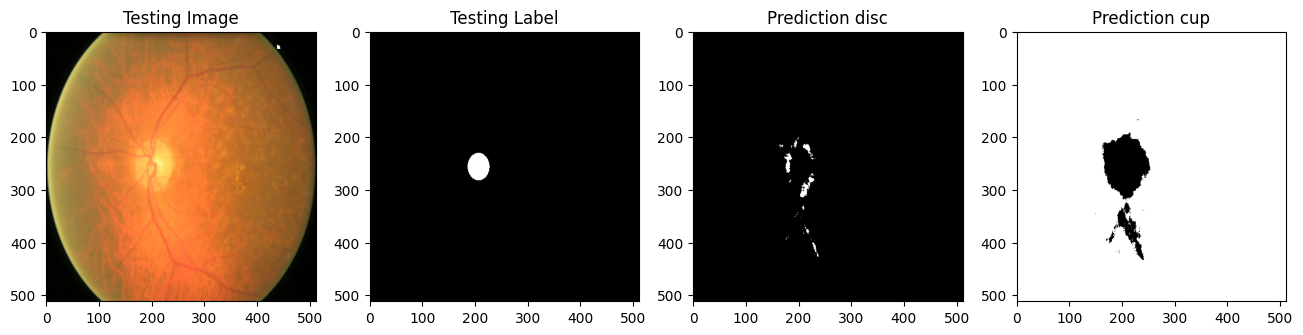

29


In [49]:
from keras.models import load_model
import random
#model = load_model('/content/drive/MyDrive/Models/ASKI_UnetLeakyReLU_maxactfunv;2;3,3_16-07-22.hdf5')
for i in range(0,30):
  test_img_number = random.randint(0, len(X_test)-1)
  test_img_number = i
  test_img = X_test[test_img_number]
  ground_truth=y_test[test_img_number]
  #test_img_norm=test_img[:,:,:]
  test_img_input=np.expand_dims(test_img, -1)
  test_img_input=np.expand_dims(test_img_input, 0)
  #model.load_weights("/content/drive/MyDrive/Weights/origaweights_kiunet_150img_100eps_13-07-2022.h5")
  prediction = (model.predict(test_img_input))
  #predictions = np.argmax(prediction, axis=-1)

  pred=np.asarray(prediction)
  grd =np.asarray(ground_truth)
  pred.shape
  plt.figure(figsize=(16, 8))  
  plt.subplot(141)
  plt.title('Testing Image')
  plt.imshow(test_img)
  plt.subplot(142)
  plt.title('Testing Label')
  plt.imshow(grd[:,:,2],cmap='gray')
  print(grd[:,:,2].shape)
  plt.subplot(143)
  plt.title('Prediction disc')
  #plt.imshow(pred, cmap='gray')
  print(pred[:,:,2].shape)
  plt.imshow((pred[0][:,:,1]>0.6),cmap='gray')
  plt.subplot(144)
  plt.title('Prediction cup')
  #plt.imshow(pred, cmap='gray')
  print(pred[:,:,2].shape)
  plt.imshow((pred[0][:,:,0]>0.6),cmap='gray')
  plt.show()
  print(test_img_number)      

In [50]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 14s 14s/step - loss: 0.0165 - accuracy: 0.9894
Accuracy =  98.94381165504456 %


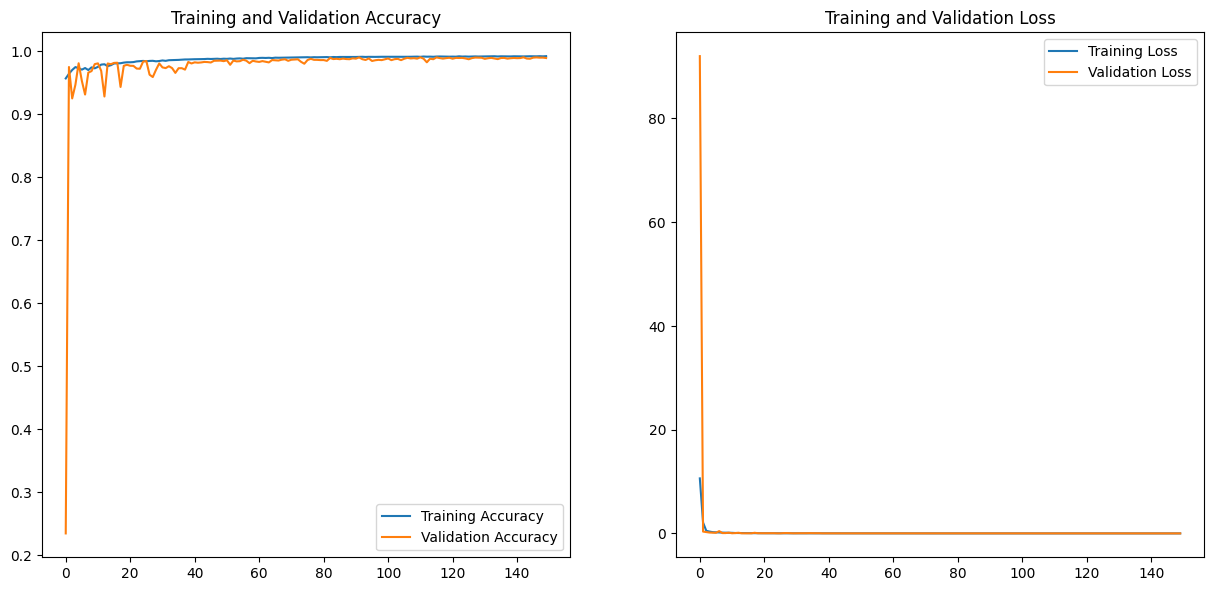

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
from keras import backend as K
def iou_coef(grd, pred, smooth=1):
  intersection = K.sum(K.abs(grd * pred), axis=[1,2,3])
  union = K.sum(grd,[1,2,3])+K.sum(pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  
  return iou

#print(grd,pred)


In [53]:
def dice_coef(grd, pred, smooth=1):
  intersection = K.sum(grd * pred, axis=[1,2,3])
  union = K.sum(grd, axis=[1,2,3]) + K.sum(pred, axis=[1,2,3])
  dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
  return dice

In [54]:
print("IOU score= " ,iou_coef(y_test,prediction))
print("Dice coefficient = ",dice_coef(y_test,prediction))

IOU score=  tf.Tensor(0.91399306, shape=(), dtype=float32)
Dice coefficient =  tf.Tensor(0.95492333, shape=(), dtype=float32)


In [55]:
def iou(pred, grd):
  ## box = [x1, y1, x2, y2] where x1, y1 is the top left corner of the box and x2, y2 is the bottom right corner of the box
  
  # determine the (x, y)-coordinates of the intersection rectangle
  xi1 = max(pred[0], grd[0])
  yi1 = max(pred[1], grd[1])
  xi2 = min(pred[2], grd[2])
  yi2 = min(pred[3], grd[3])
  
  # compute the area of intersection rectangle
  inter_area = max(0, yi2 - yi1) * max(0, xi2 - xi1)
  
  pred_area = (pred[3] - pred[1]) * (pred[2] - pred[0])
  grd_area = (grd[3] - grd[1]) * (grd[2] - grd[0])
  
  # compute the intersection over union by taking the intersection area and dividing it by the pred area + grd area - the interesection area
  union_area = pred_area + grd_area - inter_area
  
  iou = inter_area / float(union_area)

  return iou

In [56]:
#pred =[0, 1, 2, 3] # To Complete
#grd = [0, 1, 2, 3]# To Complete
print(iou(pred, grd))

ValueError: ignored

In [ ]:
B = tf.keras.metrics.MeanIoU(3, name=None, dtype=None)
print(B)

In [ ]:
model.predict()

In [ ]:
from keras.models import load_model
import random
#model = load_model('Unetseg.hdf5')

test_img_number = random.randint(0, len(X_test)-1)
#test_img_number=37
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
#test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img, -1)
test_img_input=np.expand_dims(test_img_input, 0)
#model.load_weights("/content/drive/MyDrive/origaweights_1_07-05-2022.h5")
prediction = (model.predict(test_img_input))
#prediction = np.argmax(prediction, axis=-1)
print(test_img_number)
pred=np.asarray(prediction)
grd =np.asarray(ground_truth)
pred.shape
plt.figure(figsize=(16, 8))  
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(grd[:,:,1] ,cmap='gray')
print(grd[:,:,1].shape)
plt.subplot(133)
plt.title('Prediction Label')
#plt.imshow(pred, cmap='gray')
print(pred[:,:,1].shape)
plt.imshow((pred[0][:,:,1]>0.5),cmap='gray')
plt.show() 
plt.figure(figsize=(18, 10)) 
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(grd[:,:,0] ,cmap='gray')
plt.subplot(233)
plt.title('Prediction Label')
#plt.imshow(pred, cmap='gray')
plt.imshow((pred[0][:,:,0]>0.5),cmap='gray')
plt.show()

In [ ]:
np.min(pred[0][:,:,1])

In [ ]:
np.shape(prediction)

In [ ]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.5)


for n, masks in (x_test):
  ax=plt.subplot(29,2,n+1)

  df[(df["masks"]) == masks].plot(ax=ax)

  ax.set_title(masks.upper())
  ax.get_legend.remove()
  ax=set_xlabel("")


In [ ]:
y_pred=model.predict(X_test)


In [ ]:
from keras.models import load_model
import random
#model = load_model('Unetseg.hdf5')

test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
#test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img, -1)
test_img_input=np.expand_dims(test_img_input, 0)
#model.load_weights("/content/drive/MyDrive/origaweights_1_07-05-2022.h5")
prediction = (model.predict(test_img_input))

pred=np.asarray(prediction)
grd =np.asarray(ground_truth)
pred.shape
plt.figure(figsize=(16, 8))  
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(grd[:,:,1])
print(grd[:,:,1].shape)
plt.subplot(133)
plt.title('Prediction Label')
#plt.imshow(pred, cmap='gray')
print(pred[:,:,1].shape)
plt.imshow((pred[0][:,:,1]>0.6),cmap='gray')
plt.show() 

In [ ]:
from keras.models import load_model
import random
#model = load_model('Unetseg.hdf5')

test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
#test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img, -1)
test_img_input=np.expand_dims(test_img_input, 0)
#model.load_weights("/content/drive/MyDrive/origaweights_1_07-05-2022.h5")
prediction = (model.predict(test_img_input))

pred=np.asarray(prediction)
grd =np.asarray(ground_truth)
pred.shape
plt.figure(figsize=(16, 8))  
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(grd[:,:,1])
print(grd[:,:,1].shape)
plt.subplot(133)
plt.title('Prediction Label')
#plt.imshow(pred, cmap='gray')
print(pred[:,:,1].shape)
plt.imshow((pred[0][:,:,1]>0.5),cmap='gray')
plt.show() 

In [ ]:
y_pred.shape

In [ ]:
y_pred_argmax=np.argmax(y_pred, axis=3)
y_pred_argmax.shape

In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 3
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

In [ ]:
#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[1,0]+ values[2,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + +values[0,1]+ values[2,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1]  + values[0,2]+ values[1,2])
#class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
#print("IoU for class4 is: ", class4_IoU)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred1_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

In [ ]:
import splitfolders  # or import split_folders
import os 
print(os.getcwd())


In [ ]:
from keras.models import load_model
import random
 #model = load_model('origa1Unetseg200.hdf5')
test_img_number = random.randint(0, len(X_test)-1)
print(test_img_number)
test_img = X_test[test_img_number]
ground_truth=y_test_cat[test_img_number]
test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img, -1)
test_img_input=np.expand_dims(test_img_input, 0)
prediction = (model.predict(test_img_input))
#prediction = model.predict(X_test[:1])
print("prediction shape:", prediction.shape)
plt.imshow((prediction[0][:,:,0]))
plt.show() 


In [ ]:
from keras.models import load_model
import random
 #model = load_model('origa1Unetseg200.hdf5')
test_img_number = random.randint(0, len(X_test)-1)
print(test_img_number)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img, -1)
test_img_input=np.expand_dims(test_img_input, 0)
prediction = (model.predict(test_img_input))
#prediction = model.predict(X_test[:1])
print("prediction shape:", prediction.shape)
plt.imshow((prediction[0][:,:,0]*255), cmap='gray')
plt.show() 
